In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [3]:
train=pd.read_csv('../input/train.csv')
test=pd.read_csv('../input/test.csv')

In [4]:
features = [c for c in train.columns if c not in ['label']]
# target = train['label']

y=train['label']

# Drop 'label' column
X = train.drop(labels = ["label"],axis = 1) 
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X = X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)


In [5]:
# As it is a multi-class classification problem (10 classes), we will one-hot encode the target variable.
y = to_categorical(y)

In [6]:
# Normalize the data
X = X / 255.0
test = test / 255.0



In [7]:
# Step 4: Creating a validation set from the training data.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [8]:
# Step 5: Define the model structure.

# We will create a simple architecture with 2 convolutional layers, one dense hidden layer and an output layer.

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), padding='same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 5, padding='same', activation='relu'))
model.add(Conv2D(64, 5, padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:
# Next, we will compile the model we’ve created.

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        102464    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [11]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

datagen.fit(X_train)

In [12]:
# Step 6: Training the model.

# In this step, we will train the model on the training set images and validate it using, you guessed it, the validation set.
batch_size = 80
results  = model.fit_generator(datagen.flow(X_train, y_train, batch_size = batch_size), epochs=50, 
                               steps_per_epoch=X_train.shape[0] // batch_size, 
                               validation_data=(X_test, y_test))

Epoch 1/50
472/472 [==============================] - 22s 46ms/step - loss: 1.1943 - acc: 0.5886 - val_loss: 0.2858 - val_acc: 0.9126
Epoch 2/50
472/472 [==============================] - 14s 29ms/step - loss: 0.4827 - acc: 0.8487 - val_loss: 0.1381 - val_acc: 0.9574
Epoch 3/50
472/472 [==============================] - 14s 30ms/step - loss: 0.3412 - acc: 0.8953 - val_loss: 0.1011 - val_acc: 0.9698
Epoch 4/50
472/472 [==============================] - 15s 31ms/step - loss: 0.2876 - acc: 0.9139 - val_loss: 0.0848 - val_acc: 0.9738
Epoch 5/50
472/472 [==============================] - 14s 30ms/step - loss: 0.2537 - acc: 0.9230 - val_loss: 0.0875 - val_acc: 0.9714
Epoch 6/50
472/472 [==============================] - 14s 29ms/step - loss: 0.2332 - acc: 0.9304 - val_loss: 0.0800 - val_acc: 0.9748
Epoch 7/50
472/472 [==============================] - 14s 29ms/step - loss: 0.2150 - acc: 0.9364 - val_loss: 0.0879 - val_acc: 0.9733
Epoch 8/50
472/472 [==============================] - 14s 29ms

In [13]:
type(model.history)

keras.callbacks.History

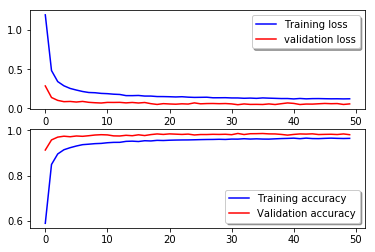

In [14]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(results.history['loss'], color='b', label="Training loss")
ax[0].plot(results.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(results.history['acc'], color='b', label="Training accuracy")
ax[1].plot(results.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [15]:
# Step 7: Find Accuracy
final_loss, final_acc = model.evaluate(X_test, y_test, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0563, final accuracy: 0.9805


In [16]:
# making predictions
# prediction = model.predict_classes(X_test)

In [17]:
# predict results
prediction = model.predict(test)
# select the indix with the maximum probability
prediction = np.argmax(prediction,axis = 1)


output=pd.DataFrame({"ImageId": list(range(1,len(prediction)+1)),
                         "Label": prediction})
output.to_csv("output.csv", index=False, header=True)